# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [3]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [4]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [5]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [6]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [7]:
K = np.arange(12)).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

SyntaxError: unmatched ')' (1164401582.py, line 1)

### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [8]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [ ]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [ ]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [ ]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [ ]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('image.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

In [ ]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.png`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

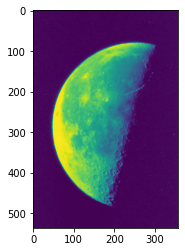

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))
myimage = openImage('./img/moon.png')
plt.imshow(myimage)

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [10]:
def countPixels(I,k):
    """ Array*int -> int"""
    return len(np.where(I==k)[0])
countPixels(myimage, 253)

35

3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [16]:
import pandas as pd
d = {}
for i in range(257):
    d[i] = countPixels(myimage, i)
pd.Series(d).sort_values(ascending=False).head()

2    30924
3    25408
1    20126
4    17167
5    11368
dtype: int64

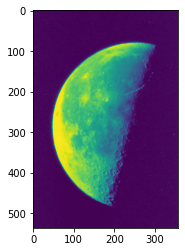

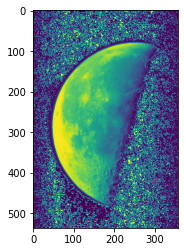

In [ ]:
import matplotlib.pyplot as plt
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    I_copy = I.copy()
    I_copy[I_copy == k1] = k2
    return I_copy
plt.imshow(myimage)
plt.show()
plt.imshow(replacePixels(myimage, 2, 253))

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

0 253


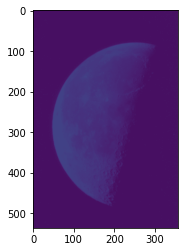

In [107]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    min_i = np.min(I)
    max_i = np.max(I)
    return ((I - min_i)/(max_i - min_i)) * (k2 - k1) + k1
plt.imshow(normalizeImage(myimage, 10, 50), vmin=0, vmax=255)

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

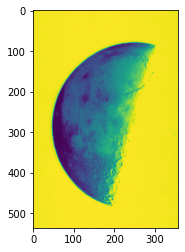

In [21]:
def inverteImage(I):
    """ Array -> Array """
    a = lambda x : 255-x
    return a(I)
plt.imshow(inverteImage(myimage))

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [20]:
def computeHistogram(I):
    """ Array -> list[int] """
    l = []
    for i in range(257):
        l.append(countPixels(I, i)) # Absolument pas optimisé car on parcours l'image à chaque fois
                                    # On pourrait sinon faire une boucle unique avec un dictionnaire i:nb_i
    return np.array(l)

# use comments to answer to a verbal question
# I don't think so, to count every pixel, we must check each of them at least once. 

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

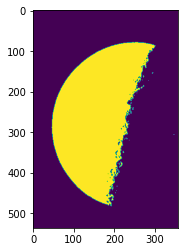

In [15]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    I_copy = I.copy()
    return np.where(I<s, 0, 255)
plt.imshow(thresholdImage(myimage, 50))

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

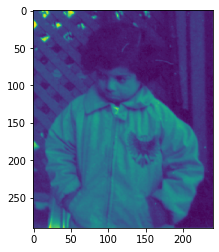

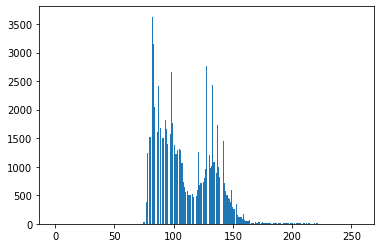

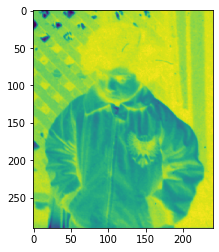

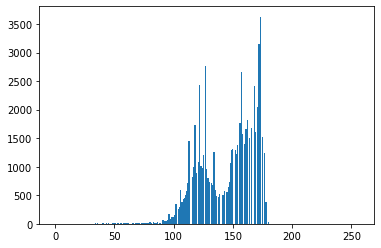

In [61]:
import matplotlib.pyplot as plt

## your code start below
def plot_histogram(img):
    y = computeHistogram(img)
    x = list(range(len(y)))
    w = [1]*len(y)
    fig, ax = plt.subplots()
    plt.bar(x,y, w, align='center')
    plt.show()

def faire_plein_de_belle_chose(path):
    img = openImage(path)
    plt.imshow(img)
    plot_histogram(img)
    img_inv = inverteImage(img)
    plt.imshow(img_inv)
    plot_histogram(img_inv)
faire_plein_de_belle_chose('./img/pout.png')

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

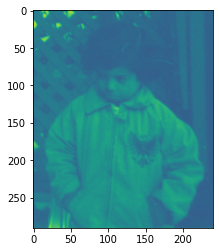

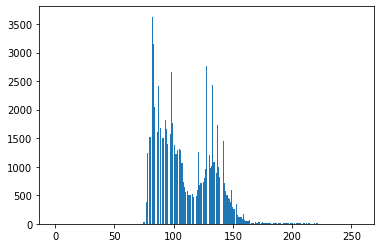

74 224


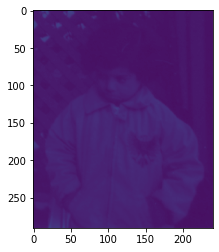

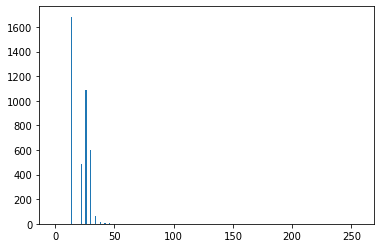

In [108]:
img = openImage('./img/pout.png')
plt.imshow(img, vmin=0, vmax=255)
plot_histogram(img)
img_norm = normalizeImage(img, 10, 50)
plt.imshow(img_norm, vmin=0, vmax=255)
plot_histogram(img_norm)

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

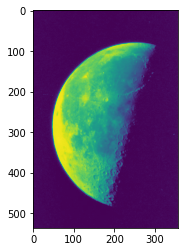

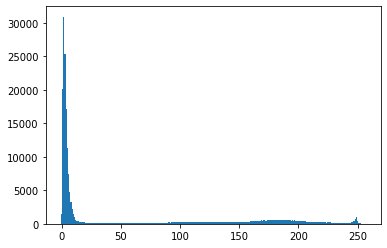

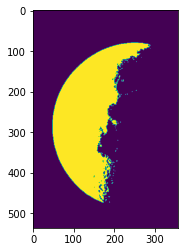

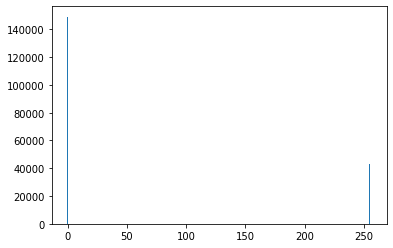

1

In [38]:
img = openImage('./img/moon.png')
plt.imshow(img, vmin=0, vmax=255)
plot_histogram(img)
img_thr = thresholdImage(img, 127)
plt.imshow(img_thr, vmin=0, vmax=255)
plot_histogram(img_thr)

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 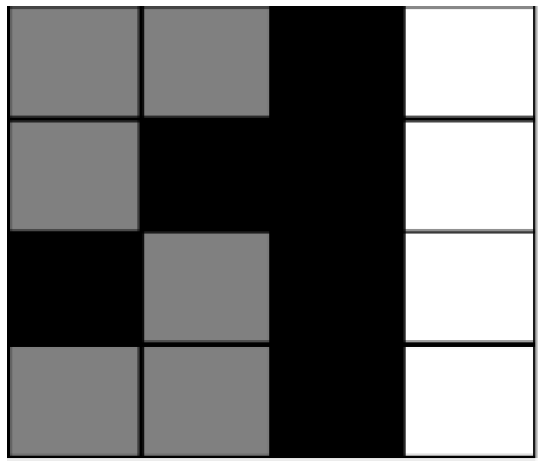 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

In [ ]:
# Pas d'image ?
I = np.zero()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

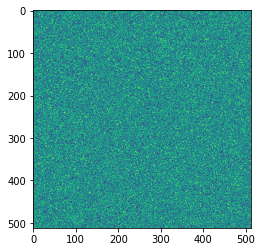

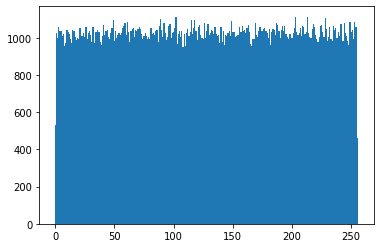

On retrouve la densité d'une loi uniforme de 0 à 255


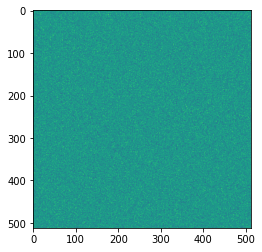

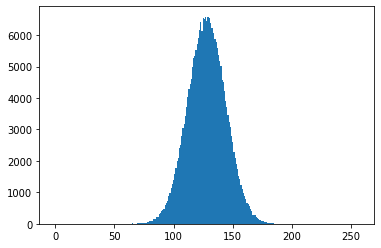

On retrouve la densité d'une loi normale centré en 128 et d'écart type 16
Je veux regarder la fonction de répartition !


In [69]:
import numpy.matlib as npm
uni_rand_img = (npm.rand((512,512))*255).round()
plt.imshow(uni_rand_img)
plt.show()
plot_histogram(uni_rand_img)
print("On retrouve la densité d'une loi uniforme de 0 à 255")

normal_rand_img = (16*npm.randn((512,512))+128).round().clip(min=0, max=255)
plt.imshow(normal_rand_img)
plot_histogram(normal_rand_img)
print("On retrouve la densité d'une loi normale centré en 128 et d'écart type 16")
print("Je veux regarder la fonction de répartition !")

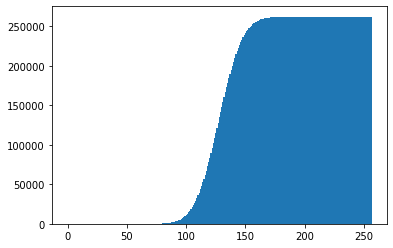

In [78]:
def computeCumHistogram(img):
    y = computeHistogram(img)
    return y.cumsum()
def plot_cum_histogram(img):
    y = computeCumHistogram(img)
    x = list(range(len(y)))
    w = [1]*len(y)
    fig, ax = plt.subplots()
    plt.bar(x,y, w, align='center')
    plt.show()
plot_cum_histogram(normal_rand_img)
print("C'est beau")

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

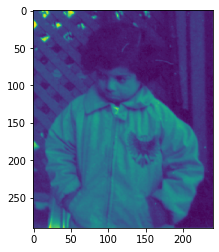

In [74]:
img = openImage('img/pout.png')
plt.imshow(img,)

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

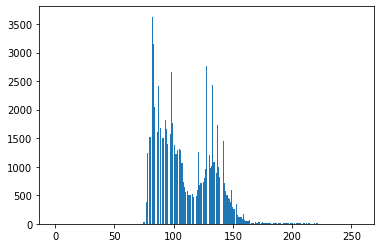


Min : 74
Max : 224



In [76]:
plot_histogram(img)
print(f"""
Min : {np.min(img)}
Max : {np.max(img)}
""")
# Il y a pas beaucoup de contraste. 

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

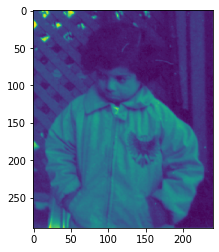

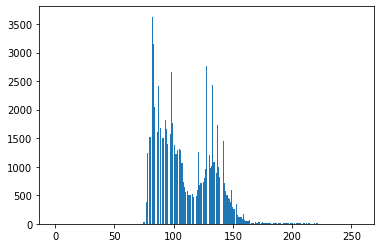

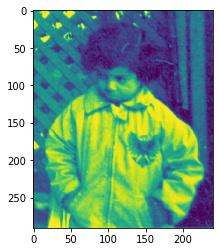

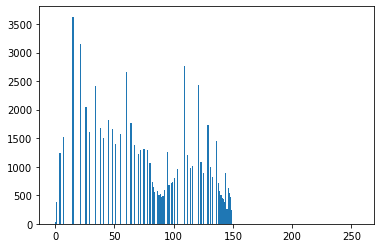

In [97]:
def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    I_copy = I.copy()
    h_c = h.cumsum()
    L = np.max(I) - np.min(I)
    N, M = I.shape
    flat_hist = ((L-1)/(N*M) * h_c).round()
    for i in range(len(flat_hist)):
        I_copy[I_copy==i] = flat_hist[i]
    return I_copy
flat_hist_img = histogramEqualization(img , computeHistogram(img))
plt.imshow(img)
plt.show()
plot_histogram(img)
plt.imshow(flat_hist_img)
plot_histogram(flat_hist_img)
# L'image est bien meilleurs !!
# Meilleur contraste, les régions à faible contraste en ont gagné
# On constate également que l'histogramme n'est pas parfait